In [117]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from IPython.display import display,Math

The critical points are [-1.  1.][0.]


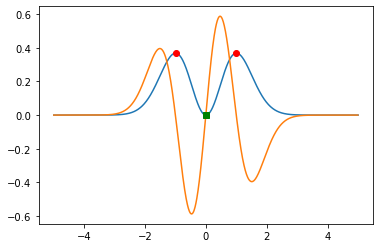

In [41]:
#Empirical method
x = np.linspace(-5,5,1001)
fx = x**2 * np.exp(-x**2)
dfx = np.diff(fx)/(x[1]-x[0])

localmax = find_peaks(fx)[0]
localmin = find_peaks(-fx)[0]

print('The critical points are ' + str(x[localmax]) + str(x[localmin]))

plt.plot(x,fx)
plt.plot(x[0:-1],dfx)

plt.plot(x[localmax],fx[localmax],'ro')
plt.plot(x[localmin],fx[localmin],'gs')
plt.show()

-2*x**3*exp(-x**2) + 2*x*exp(-x**2)
[-1, 0, 1]


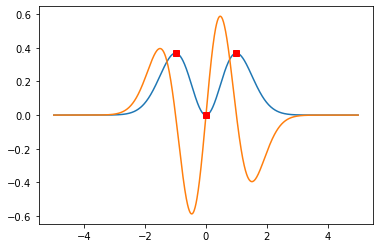

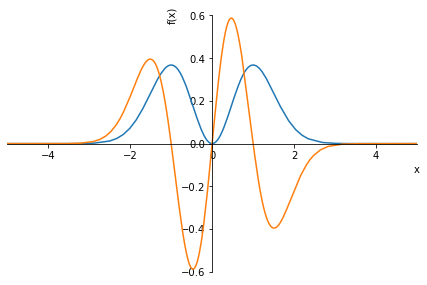

In [79]:
import sympy.plotting.plot as symplot

x = sym.symbols('x')
fx = x**2 * sym.exp(-x**2)
dfx = fx.diff(x)
print(dfx)
critpnts = sym.solve(dfx)
critpntsy = [fx.subs(x,a) for a in critpnts]
print(critpnts)

xx = np.linspace(-5,5,1000)
yy = sym.lambdify(x,fx)(xx)
dfyy = sym.lambdify(x,dfx)(xx)
plt.plot(xx,yy)
plt.plot(xx,dfyy)
plt.plot(critpnts,critpntsy,'rs')
plt.show()

p = symplot(fx,dfx,show=False)
p.xlim = [-5,5]
p.ylim = [-.6,.6]
p.show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

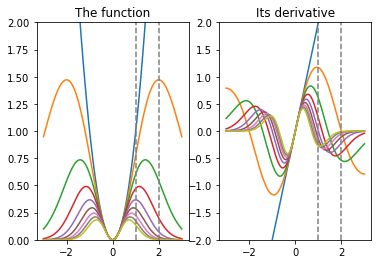

In [120]:
x,a = sym.symbols('x,a')

basefx = x**2*sym.exp(-a*x**2)
arange = np.arange(0,2.25,.25)
xrange = np.linspace(-3,3,200)

# Setup the figure

fig,ax = plt.subplots(1,2)

for ai in arange:
    fx = basefx.subs(a,ai)
    dfx = sym.diff(fx)
    critpnts = sym.solve(dfx)
#     print(critpnts)
    
    # Plotting
    ax[0].plot(xrange,sym.lambdify(x,fx)(xrange))
    ax[1].plot(xrange,sym.lambdify(x,dfx)(xrange))
    
# Test for critical points

    if 1 in critpnts:
        display(Math('\\Rightarrow %s \\text {has a critical point at x = 1 }'%(sym.latex(fx))))
    elif 2 in critpnts:
        display(Math('\\Rightarrow %s \\text {has a critical point at x = 2 }'%(sym.latex(fx))))
    else:
        display(Math('\\quad %s \\text {has no critical points at x = 1 or x = 2}'%sym.latex(fx)))
    
ax[0].set_ylim(0,2)
ax[0].set_title('The function')
ax[0].plot([1,1],[0,2],'--',color='gray')
ax[0].plot([2,2],[0,2],'--',color='gray')

ax[1].set_ylim(-2,2)
ax[1].set_title('Its derivative')
ax[1].plot([1,1],[-2,2],'--',color='gray')
ax[1].plot([2,2],[-2,2],'--',color='gray')